# Period poverty research in Bardejov
After the installation of menstrual lockers

#### Imports

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load data

In [34]:
after_data = pd.read_csv('after_installation_data.csv')
after_data.head()

,Timestamp,Vek,Škola,Ročník,Chýbala si niekedy v škole kvôli menštruácii?,Koľko dní si vymeškala počas menštruácii?,Dôvod tvojej absencie počas menštruácii?,Používala si bezplatné vložky poskytované v škole?,Ovplyvnilo to tvoju dochádzku do školy počas menštruácie?,Ako sa cítiš počas menštruácie v škole teraz (počas projektu)?,...,Cítila si sa vďaka projektu psychicky lepšie?,"V mesiaci december 2025, sa prebehla vo Vašej škola séria prednášok, na tému: Dospievanie, menštruácia a menštruačná chudoba. Prednášali ti: My mami n.o., Zdravé regióny, DM Drogerie a ČLOVEK v ohrození n.o. Pomohli ti tieto aktivity získať nové informácie alebo iný pohľad na túto tému?",Aké informácie alebo témy by si do budúcna uvítala?,Téma do budúcna: iné,Téme do budúcna: Gynekologické problémy a prevencia,Téma do budúcna: Telesné zmeny v období dospievania,Téma do budúcna: Vzťah menštruácie a psychického zdravia,Téma do budúcna: Starostlivosť počas menštruácie,Téma do budúcnosti: Práva a dôstojnosť žien,Navrhuješ niečo zlepšiť v tomto projekte?
0,26.6.2025 13:54:24,16 - 18 rokov,Strednú odbornú školu bez maturity,3.0,Ano,1 deň,Mala som bolesti,Nie,"Nie, nezmenilo sa to",Horšie,...,Ano,Skôr ano,Práva a dôstojnosť žien,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,26.6.2025 13:58:21,16 - 18 rokov,Strednú odbornú školu bez maturity,3.0,Ano,1 deň,Mala som bolesti,Ano,Neviem posúdiť,Horšie,...,Ano,Určite ano,Práva a dôstojnosť žien,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,26.6.2025 14:01:08,16 - 18 rokov,Strednú odbornú školu bez maturity,3.0,Ano,2 dni,Mala som bolesti,Ano,"Nie, nezmenilo sa to",Rovnako,...,Čiastočne,Neviem posúdiť,Starostlivosť počas menštruácie,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,26.6.2025 14:04:13,Viac ako 18 rokov,Stredná odborná škola s maturitou,4.0,Nie,NaN,Iné,Nie,"Nie, nezmenilo sa to",Rovnako,...,Čiastočne,Skôr ano,Starostlivosť počas menštruácie,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,26.6.2025 14:07:31,Viac ako 18 rokov,Stredná odborná škola s maturitou,5.0,Nie,NaN,Iné,Ano,Neviem posúdiť,Lepšie ako predtým,...,Nie,Skôr ano,Vzťah menštruácie a psychického zdravia,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [35]:
# Clean leading and trailing spaces in values
after_data = after_data.applymap(lambda x: x.strip() if isinstance(x, str)
                                    else x)

/var/folders/xl/2wwrkqc91pq3zqg3xpy5d3_80000gn/T/ipykernel_42768/1625617412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  after_data = after_data.applymap(lambda x: x.strip() if isinstance(x, str)


## Statistics

In [36]:
# Number of responders
num_responders = after_data.shape[0]
print(f"Number of responders: {num_responders}")

Number of responders: 79


In [37]:
# Age distribution
print("\n--- Age Distribution ---")
age_counts = after_data['Vek'].value_counts()
for age, count in age_counts.items():
    print(f"  {age}: {count} ({count/num_responders*100:.1f}%)")


--- Age Distribution ---
  16 - 18 rokov: 49 (62.0%)
  Viac ako 18 rokov: 25 (31.6%)


In [38]:
# Missed school due to menstruation
print("\n--- Missed School Due to Menstruation ---")
missed_school = after_data['Chýbala si niekedy v škole kvôli menštruácii?'].value_counts()
for answer, count in missed_school.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Missed School Due to Menstruation ---
  Ano: 42 (53.2%)
  Nie: 36 (45.6%)
  Nechcem odpovedať: 1 (1.3%)


In [39]:
# Days missed (only for those who missed)
print("\n--- Days Missed (among those who missed) ---")
days_missed = after_data['Koľko dní si vymeškala počas menštruácii?'].value_counts()
for days, count in days_missed.items():
    print(f"  {days}: {count}")


--- Days Missed (among those who missed) ---
  1 deň: 26
  Menej ako 1 deň: 19
  2 dni: 11
  Viac ako 3 dni: 4
  3 dni: 1


In [40]:
# Reason for absence
print("\n--- Reason for Absence ---")
reasons = after_data['Dôvod tvojej absencie počas menštruácii?'].value_counts()
for reason, count in reasons.items():
    print(f"  {reason}: {count}")


--- Reason for Absence ---
  Mala som bolesti: 53
  Iné: 5
  Nemala som možnosť sa hygienicky upraviť v škole: 1
  Nemala som hygienické pomôcky: 1
  Hanbila som sa: 1


In [41]:
# Used free pads
print("\n--- Used Free Pads Provided at School ---")
used_pads = after_data['Používala si bezplatné vložky poskytované v škole?'].value_counts()
for answer, count in used_pads.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Used Free Pads Provided at School ---
  Nie: 43 (54.4%)
  Ano: 33 (41.8%)
  Nechcem odpovedať: 2 (2.5%)


In [42]:
# Did menstration affect your absence
print("\n--- Absence affected by menstruation ---")
absence_affected = after_data['Ovplyvnilo to tvoju dochádzku do školy počas menštruácie?'].value_counts()
for answer, count in absence_affected.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Absence affected by menstruation ---
  Nie, nezmenilo sa to: 51 (64.6%)
  Neviem posúdiť: 19 (24.1%)
  Ano, chodila som do školy častejšie: 9 (11.4%)


In [43]:
# Feelings during the project
print("\n--- Feelings during the project ---")
feelings = after_data['Ako sa cítiš počas menštruácie v škole teraz (počas projektu)?'].value_counts()
for answer, count in feelings.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")



--- Feelings during the project ---
  Rovnako: 58 (73.4%)
  Lepšie ako predtým: 14 (17.7%)
  Horšie: 7 (8.9%)


In [44]:
# Feel more confident
print("\n--- Feel More Confident with Products Available ---")
confident = after_data['Cítiš sa istejšie, keď vieš, že máš v škole k dispozícii hygienické pomôcky?'].value_counts()
for answer, count in confident.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Feel More Confident with Products Available ---
  Ano: 63 (79.7%)
  Neviem: 9 (11.4%)
  Nie: 6 (7.6%)


In [45]:
# Want project to continue
print("\n--- Want Project to Continue ---")
continue_proj = after_data['Chcela by si, aby sa poskytovanie vložiek na škole zachovalo aj naďalej?'].value_counts()
for answer, count in continue_proj.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Want Project to Continue ---
  Ano: 68 (86.1%)
  Je mi to jedno: 11 (13.9%)


In [46]:
#  Want project to continue in further years 
print("\n--- Want project to continue in further years ---")
continue_proj_years = after_data['Chcela by si, aby boli vložky zadarmo poskytované aj v ďalších školských rokoch?'].value_counts()
for answer, count in continue_proj_years.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Want project to continue in further years ---
  Ano, určite: 69 (87.3%)
  Možno: 10 (12.7%)


In [47]:
#  Did the respondents use the free menstruation products
print("\n--- Were the products used ---")
products_used = after_data['Využili ste niekedy menštruačné pomôcky, ktoré boli v rámci projektu zdarma k dispozícii na škole?'].value_counts()
for answer, count in products_used.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Were the products used ---
  Ano, viackrát: 24 (30.4%)
  Vedela som o nich, ale nepotrebovala som ich: 21 (26.6%)
  Nie: 19 (24.1%)
  Ano, raz: 14 (17.7%)
  Nevedela som, že sú dostupné: 1 (1.3%)


In [48]:
#  Did the project help with a specific issue the respondents face
print("\n--- Did the project help with a specific issue ---")
project_help = after_data['Ak áno, pomohlo ti to vyriešiť niektorý konkrétny problém?'].value_counts()
for answer, count in project_help.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Did the project help with a specific issue ---
  Cítila som sa pokojnejšie a bezpečnejšie: 20 (25.3%)
  Nepomohlo / nič z toho sa ma netýka: 18 (22.8%)
  Pomohlo mi to vyhnúť sa pretečeniu/nepríjemnosťam: 17 (21.5%)
  Nemala som pri sebe pomôcku a pomohlo mi to prekonať stres: 9 (11.4%)
  Iné: 2 (2.5%)
  Pomohlo mi to s infekciami alebo zdravotným diskomfortom: 1 (1.3%)


In [49]:
#  Information source
print("\n--- Information source about the products ---")
info_source = after_data['Ako si sa o menštruačných pomôckach na škole dozvedela?'].value_counts()
for answer, count in info_source.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")
    


--- Information source about the products ---
  Od učiteľky/ učiteľa: 56 (70.9%)
  Od spolužiakoch: 10 (12.7%)
  Cez plagát alebo oznám: 7 (8.9%)
  Inak: 5 (6.3%)


In [50]:
#  Easiness of using provided products
print("\n--- Easiness of using provided products ---")
easy_access = after_data['Bolo podľa teba jednoduché si tieto vložky, zobrať v škole?'].value_counts()
for answer, count in easy_access.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")
    


--- Easiness of using provided products ---
  Ano, úplne bez problemov: 44 (55.7%)
  Vôbec som si ich nezobrala: 26 (32.9%)
  Ano, ale najprv som sa hanbila: 8 (10.1%)


In [51]:
# Project was useful
print("\n--- Project Was Useful for Girls ---")
useful = after_data['Mala si pocit, že projekt bol pre dievčatá užitočný?'].value_counts()
for answer, count in useful.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Project Was Useful for Girls ---
  Ano: 70 (88.6%)
  Neviem posúdiť: 8 (10.1%)


In [52]:
# Project affected how is menstruation disccussed in the school
print("\n--- Project affected how is menstruation disccussed in the school ---")
disc_school = after_data['Myslíš si, že projekt prispel k tomu, aby sa o menštruácii v škole hovorilo otvorenejšie a prirodzenejšie?'].value_counts()
for answer, count in disc_school.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Project affected how is menstruation disccussed in the school ---
  Určite ano: 44 (55.7%)
  Skôr ano: 26 (32.9%)
  Skôr nie: 8 (10.1%)


In [53]:
# Fix case issue and check psychological benefit
print("\n--- Feel Psychologically Better Due to Project ---")
after_data['Cítila si sa vďaka projektu psychicky lepšie?'] = after_data['Cítila si sa vďaka projektu psychicky lepšie?'].str.capitalize()
psych_better = after_data['Cítila si sa vďaka projektu psychicky lepšie?'].value_counts()
for answer, count in psych_better.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Feel Psychologically Better Due to Project ---
  Ano: 28 (35.4%)
  Čiastočne: 21 (26.6%)
  Neviem: 21 (26.6%)
  Nie: 8 (10.1%)


In [54]:
# Lectures helped gain new information
print("\n--- Lectures Helped Gain New Information ---")
lectures = after_data['V mesiaci december 2025, sa prebehla vo Vašej škola séria prednášok, na tému: Dospievanie, menštruácia a menštruačná chudoba. Prednášali ti: My mami n.o., Zdravé regióny, DM Drogerie a ČLOVEK v ohrození n.o. Pomohli ti tieto aktivity získať nové informácie alebo iný pohľad na túto tému?'].value_counts()
for answer, count in lectures.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Lectures Helped Gain New Information ---
  Určite ano: 29 (36.7%)
  Skôr ano: 23 (29.1%)
  Neviem posúdiť: 18 (22.8%)
  Skôr nie: 5 (6.3%)
  Určite nie: 2 (2.5%)


In [55]:
# Lectures for future
print("\n--- Lectures for future ---")
lectures_fut = after_data['Aké informácie alebo témy by si do budúcna uvítala?'].value_counts()
for answer, count in lectures_fut.items():
    print(f"  {answer}: {count} ({count/num_responders*100:.1f}%)")


--- Lectures for future ---
  Gynekologické problémy a prevencia: 15 (19.0%)
  Práva a dôstojnosť žien: 12 (15.2%)
  Starostlivosť počas menštruácie: 10 (12.7%)
  iné: 10 (12.7%)
  Vzťah menštruácie a psychického zdravia: 4 (5.1%)
  Telesné zmeny v období dospievania, Gynekologické problémy a prevencia: 4 (5.1%)
  Práva a dôstojnosť žien, Gynekologické problémy a prevencia: 4 (5.1%)
  Starostlivosť počas menštruácie, Telesné zmeny v období dospievania, Práva a dôstojnosť žien, Gynekologické problémy a prevencia, Vzťah menštruácie a psychického zdravia: 3 (3.8%)
  Telesné zmeny v období dospievania, Práva a dôstojnosť žien: 2 (2.5%)
  Starostlivosť počas menštruácie, Práva a dôstojnosť žien, Gynekologické problémy a prevencia, Vzťah menštruácie a psychického zdravia: 2 (2.5%)
  Starostlivosť počas menštruácie, Telesné zmeny v období dospievania, Gynekologické problémy a prevencia, Vzťah menštruácie a psychického zdravia: 2 (2.5%)
  Starostlivosť počas menštruácie, Telesné zmeny v obdob

## Setup 

In [56]:
answer_map = {
    'Ano': 'Yes',
    'Nie': 'No',
    'Nechcem odpovedať': "Don't want to answer"
}

days_map = {
    'Menej ako 1 deň': 'Less than 1 day',
    '1 deň': '1 day',
    '2 dni': '2 days',
    '3 dni': '3 days',
    'Viac ako 3 dni': 'More than 3 days'
}

reasons_map = {
    'Mala som bolesti': 'Pain',
    'Nemala som možnosť sa hygienicky upraviť v škole': 'Couldn\'t hygienically clean myself at school',
    'Nemala som hygienické pomôcky':  'Didn\'t have hygienic products',
    'Iné': 'Other reason',
    'Hanbila som sa' : 'I felt ashamed'
}

## Visualizations

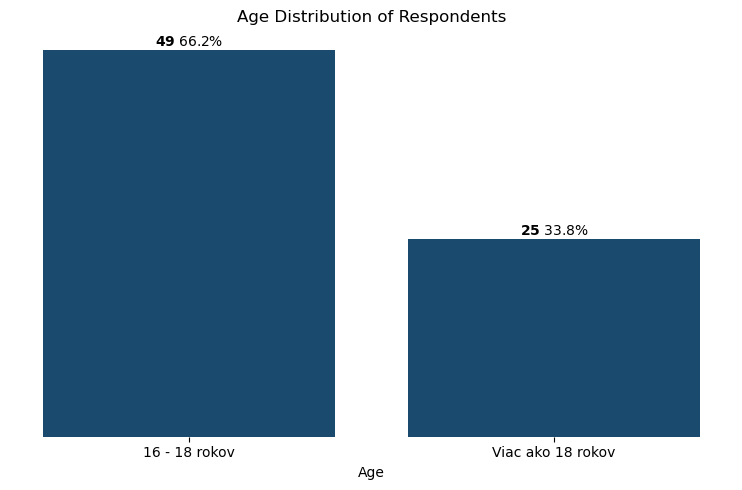

In [57]:
## Age distribution 

plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color='#1a4a6e')
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Age Distribution of Respondents')
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().yaxis.set_visible(False)

total = sum(age_counts.values)
for i, v in enumerate(age_counts.values):
    percentage = v / total * 100
    plt.text(i, v + 0.5, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", ha='center', fontsize=10)

plt.show()


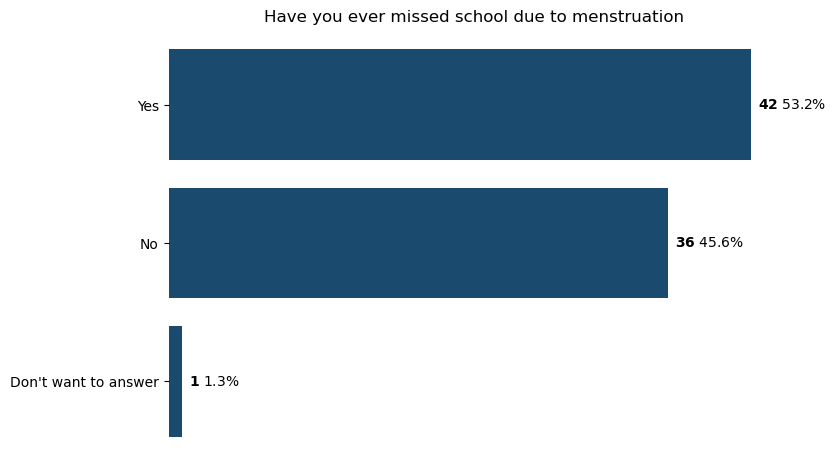

In [58]:
## Missed school due to menstruation  

missed_school = after_data['Chýbala si niekedy v škole kvôli menštruácii?'].map(answer_map).value_counts()
missed_school = missed_school.reindex(['Yes', 'No', 'Don\'t want to answer'])

plt.figure(figsize=(8, 5))
bars = plt.barh(missed_school.index, missed_school.values, color='#1a4a6e')
plt.title('Have you ever missed school due to menstruation')
plt.gca().invert_yaxis()

plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(missed_school.values)
for i, v in enumerate(missed_school.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()


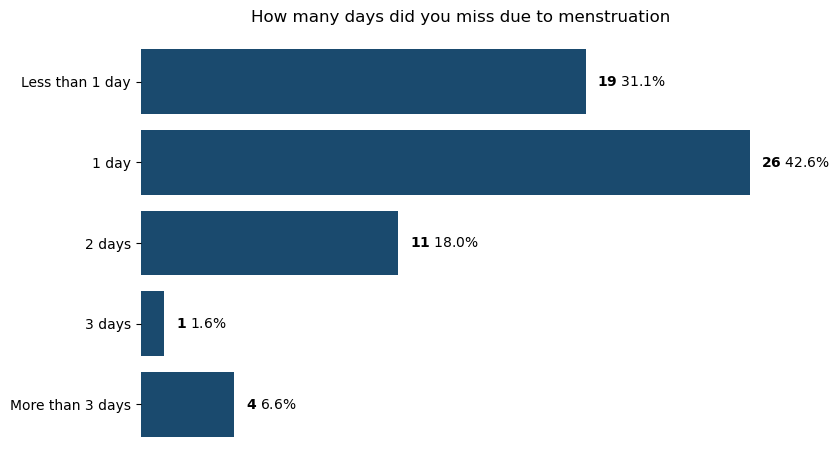

In [59]:
## Missed school due to menstruation  
days_missed = after_data['Koľko dní si vymeškala počas menštruácii?'].map(days_map).value_counts()
order = ["Less than 1 day", '1 day', '2 days', '3 days', 'More than 3 days']
days_missed = days_missed.reindex([x for x in order if x in days_missed.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(days_missed.index, days_missed.values, color='#1a4a6e')
plt.title('How many days did you miss due to menstruation')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(days_missed.values)
for i, v in enumerate(days_missed.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

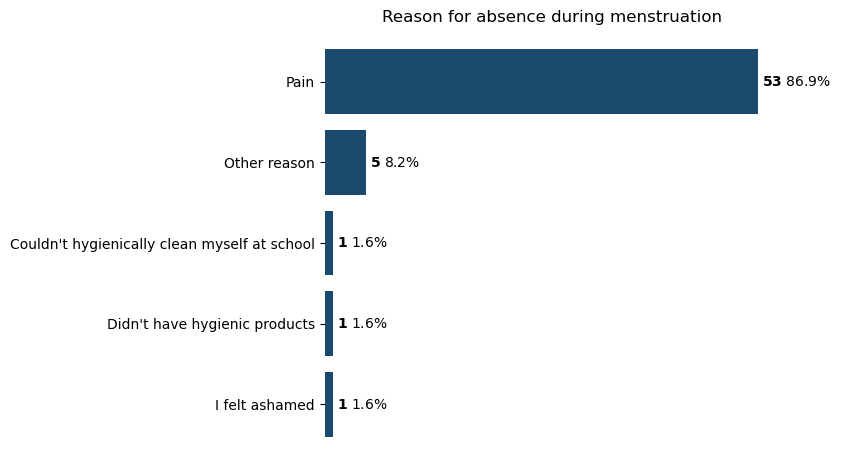

In [60]:
## Reason for absence

reasons = after_data['Dôvod tvojej absencie počas menštruácii?'].map(reasons_map).value_counts()

plt.figure(figsize=(8, 5))
bars = plt.barh(reasons.index, reasons.values, color='#1a4a6e')
plt.title('Reason for absence during menstruation')
plt.gca().invert_yaxis()
plt.tight_layout()

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(reasons.values)
for i, v in enumerate(reasons.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

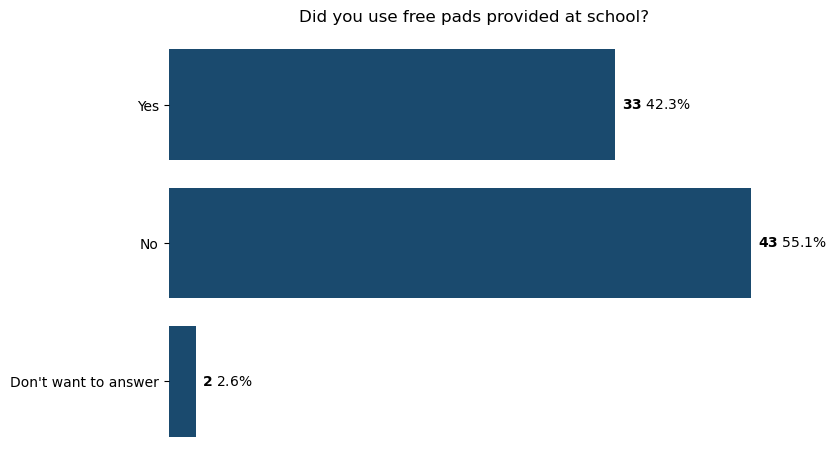

In [61]:
## Used free pads provided at school

used_pads_map = {
    'Ano': 'Yes',
    'Nie': 'No',
    'Nechcem odpovedať': "Don't want to answer"
}

used_pads = after_data['Používala si bezplatné vložky poskytované v škole?'].map(used_pads_map).value_counts()
used_pads = used_pads.reindex(['Yes', 'No', "Don't want to answer"])

plt.figure(figsize=(8, 5))
bars = plt.barh(used_pads.index, used_pads.values, color='#1a4a6e')
plt.title('Did you use free pads provided at school?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(used_pads.values)
for i, v in enumerate(used_pads.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

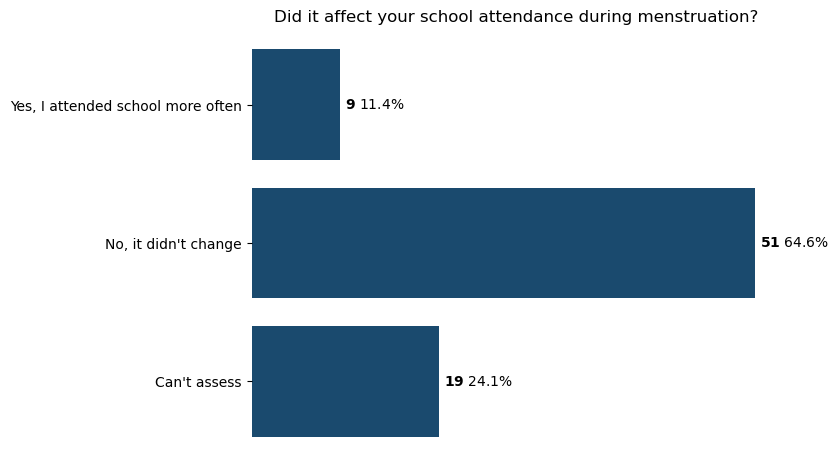

In [62]:
## Attendance affected by menstruation

attendance_map = {
    'Ano, chodila som do školy častejšie': 'Yes, I attended school more often',
    'Nie, nezmenilo sa to': 'No, it didn\'t change',
    'Neviem posúdiť': 'Can\'t assess'
}

attendance = after_data['Ovplyvnilo to tvoju dochádzku do školy počas menštruácie?'].map(attendance_map).value_counts()
order = ['Yes, I attended school more often', 'No, it didn\'t change', 'Can\'t assess']
attendance = attendance.reindex([x for x in order if x in attendance.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(attendance.index, attendance.values, color='#1a4a6e')
plt.title('Did it affect your school attendance during menstruation?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(attendance.values)
for i, v in enumerate(attendance.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

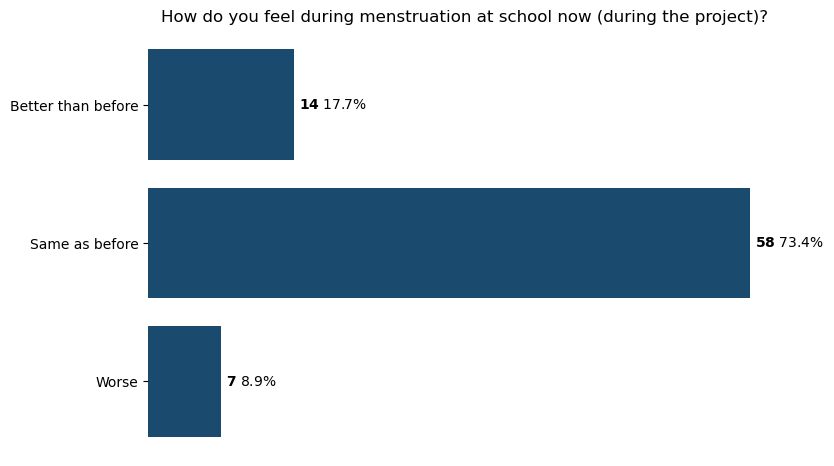

In [63]:
## Feelings during the project

feelings_map = {
    'Lepšie ako predtým': 'Better than before',
    'Rovnako': 'Same as before',
    'Horšie': 'Worse'
}

feelings = after_data['Ako sa cítiš počas menštruácie v škole teraz (počas projektu)?'].map(feelings_map).value_counts()
order = ['Better than before', 'Same as before', 'Worse']
feelings = feelings.reindex([x for x in order if x in feelings.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(feelings.index, feelings.values, color='#1a4a6e')
plt.title('How do you feel during menstruation at school now (during the project)?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(feelings.values)
for i, v in enumerate(feelings.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

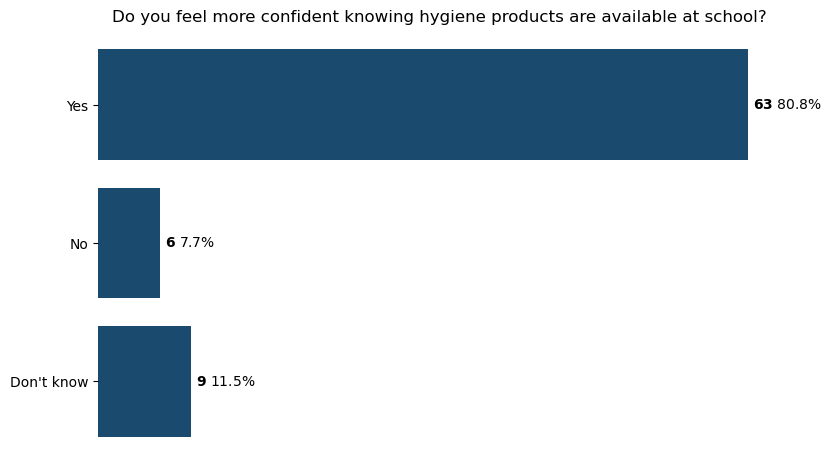

In [64]:
## Feel more confident with products available

confident_map = {
    'Ano': 'Yes',
    'Nie': 'No',
    'Neviem': "Don't know"
}

confident = after_data['Cítiš sa istejšie, keď vieš, že máš v škole k dispozícii hygienické pomôcky?'].map(confident_map).value_counts()
order = ['Yes', 'No', "Don't know"]
confident = confident.reindex([x for x in order if x in confident.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(confident.index, confident.values, color='#1a4a6e')
plt.title('Do you feel more confident knowing hygiene products are available at school?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(confident.values)
for i, v in enumerate(confident.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

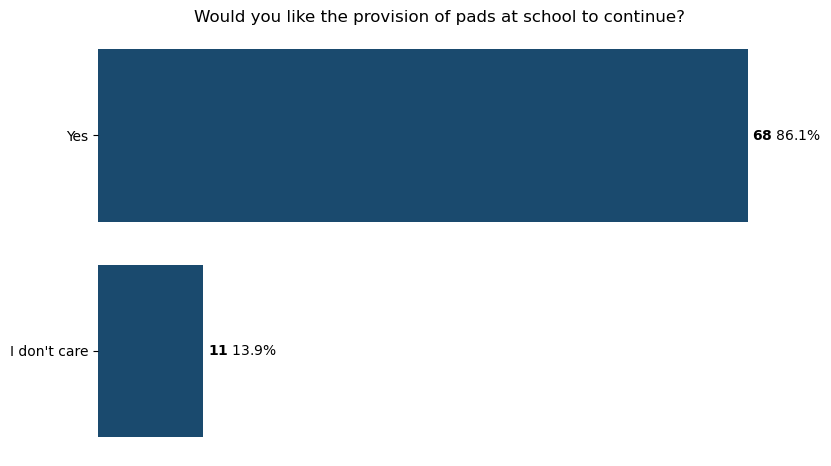

In [65]:
## Want project to continue

continue_map = {
    'Ano': 'Yes',
    'Je mi to jedno': "I don't care"
}

continue_proj = after_data['Chcela by si, aby sa poskytovanie vložiek na škole zachovalo aj naďalej?'].map(continue_map).value_counts()
order = ['Yes', "I don't care"]
continue_proj = continue_proj.reindex([x for x in order if x in continue_proj.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(continue_proj.index, continue_proj.values, color='#1a4a6e')
plt.title('Would you like the provision of pads at school to continue?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(continue_proj.values)
for i, v in enumerate(continue_proj.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

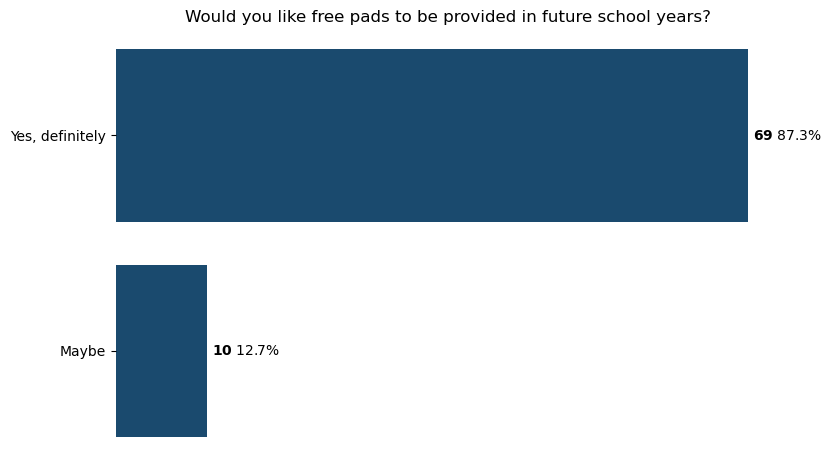

In [66]:
## Want project to continue in future years

future_map = {
    'Ano, určite': 'Yes, definitely',
    'Možno': 'Maybe'
}

future_proj = after_data['Chcela by si, aby boli vložky zadarmo poskytované aj v ďalších školských rokoch?'].map(future_map).value_counts()
order = ['Yes, definitely', 'Maybe']
future_proj = future_proj.reindex([x for x in order if x in future_proj.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(future_proj.index, future_proj.values, color='#1a4a6e')
plt.title('Would you like free pads to be provided in future school years?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(future_proj.values)
for i, v in enumerate(future_proj.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

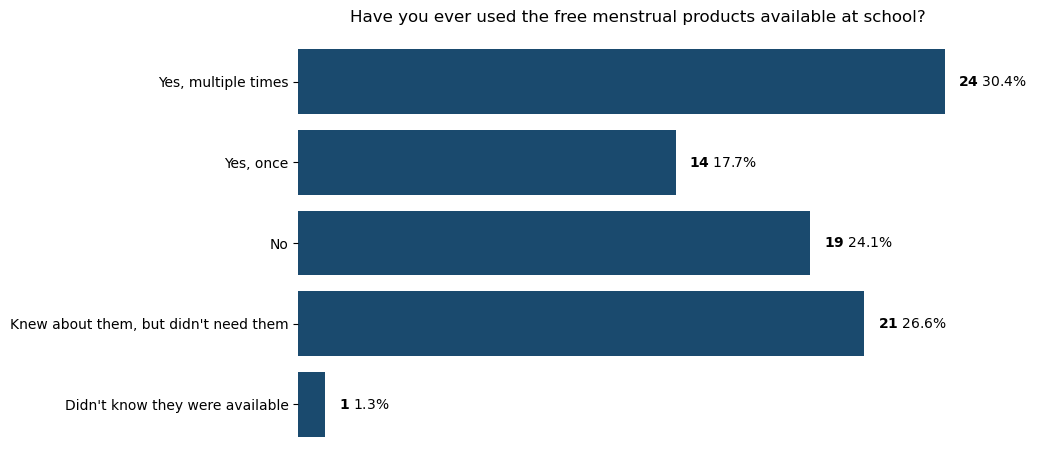

In [67]:
## Products used

products_map = {
    'Ano, viackrát': 'Yes, multiple times',
    'Ano, raz': 'Yes, once',
    'Nie': 'No',
    'Vedela som o nich, ale nepotrebovala som ich': 'Knew about them, but didn\'t need them',
    'Nevedela som, že sú dostupné': 'Didn\'t know they were available'
}

products = after_data['Využili ste niekedy menštruačné pomôcky, ktoré boli v rámci projektu zdarma k dispozícii na škole?'].map(products_map).value_counts()
order = ['Yes, multiple times', 'Yes, once', 'No', 'Knew about them, but didn\'t need them', 'Didn\'t know they were available']
products = products.reindex([x for x in order if x in products.index])

plt.figure(figsize=(10, 5))
bars = plt.barh(products.index, products.values, color='#1a4a6e')
plt.title('Have you ever used the free menstrual products available at school?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(products.values)
for i, v in enumerate(products.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

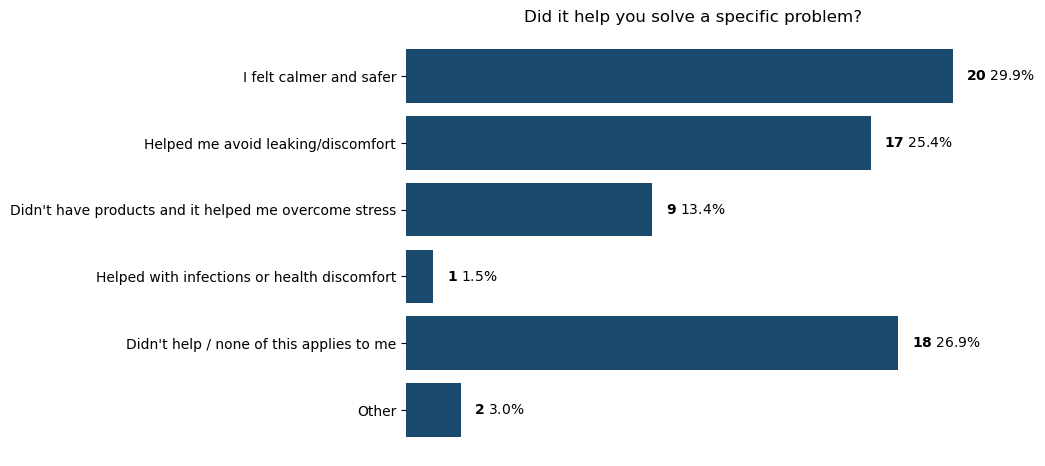

In [68]:
## Project helped with specific issue

help_map = {
    'Cítila som sa pokojnejšie a bezpečnejšie': 'I felt calmer and safer',
    'Pomohlo mi to vyhnúť sa pretečeniu/nepríjemnosťam': 'Helped me avoid leaking/discomfort',
    'Nemala som pri sebe pomôcku a pomohlo mi to prekonať stres': 'Didn\'t have products and it helped me overcome stress',
    'Pomohlo mi to s infekciami alebo zdravotným diskomfortom': 'Helped with infections or health discomfort',
    'Nepomohlo / nič z toho sa ma netýka': 'Didn\'t help / none of this applies to me',
    'Iné': 'Other'
}

help_issue = after_data['Ak áno, pomohlo ti to vyriešiť niektorý konkrétny problém?'].map(help_map).value_counts()
order = ['I felt calmer and safer', 'Helped me avoid leaking/discomfort', 'Didn\'t have products and it helped me overcome stress', 
         'Helped with infections or health discomfort', 'Didn\'t help / none of this applies to me', 'Other']
help_issue = help_issue.reindex([x for x in order if x in help_issue.index])

plt.figure(figsize=(10, 5))
bars = plt.barh(help_issue.index, help_issue.values, color='#1a4a6e')
plt.title('Did it help you solve a specific problem?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(help_issue.values)
for i, v in enumerate(help_issue.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

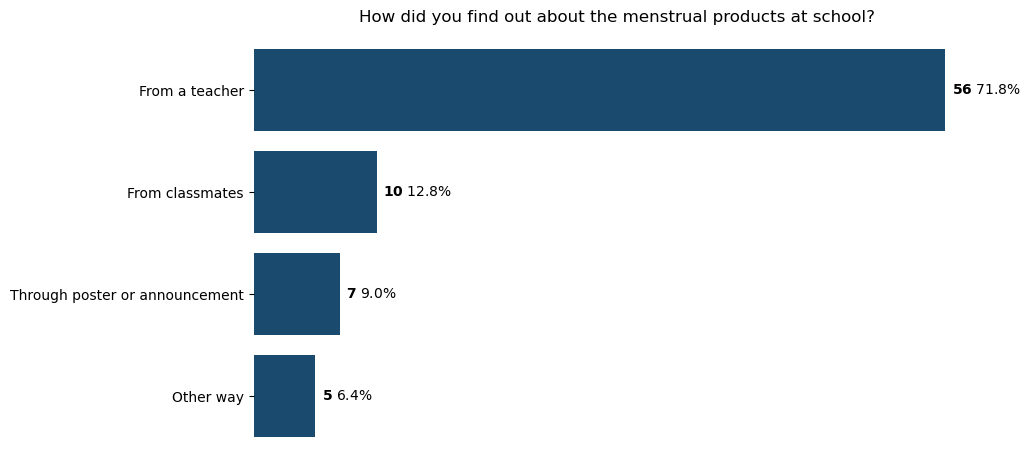

In [69]:
## Information source

source_map = {
    'Od učiteľky/ učiteľa': 'From a teacher',
    'Od spolužiakoch': 'From classmates',
    'Cez plagát alebo oznám': 'Through poster or announcement',
    'Inak': 'Other way'
}

info_source = after_data['Ako si sa o menštruačných pomôckach na škole dozvedela?'].map(source_map).value_counts()
order = ['From a teacher', 'From classmates', 'Through poster or announcement', 'Other way']
info_source = info_source.reindex([x for x in order if x in info_source.index])

plt.figure(figsize=(10, 5))
bars = plt.barh(info_source.index, info_source.values, color='#1a4a6e')
plt.title('How did you find out about the menstrual products at school?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(info_source.values)
for i, v in enumerate(info_source.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

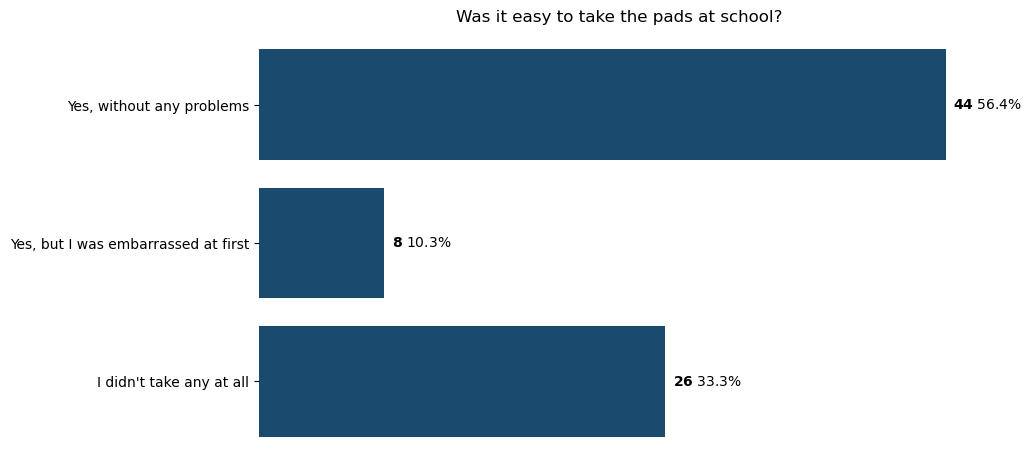

In [70]:
## Easiness of access

access_map = {
    'Ano, úplne bez problemov': 'Yes, without any problems',
    'Ano, ale najprv som sa hanbila': 'Yes, but I was embarrassed at first',
    'Vôbec som si ich nezobrala': 'I didn\'t take any at all'
}

easy_access = after_data['Bolo podľa teba jednoduché si tieto vložky, zobrať v škole?'].map(access_map).value_counts()
order = ['Yes, without any problems', 'Yes, but I was embarrassed at first', 'I didn\'t take any at all']
easy_access = easy_access.reindex([x for x in order if x in easy_access.index])

plt.figure(figsize=(10, 5))
bars = plt.barh(easy_access.index, easy_access.values, color='#1a4a6e')
plt.title('Was it easy to take the pads at school?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(easy_access.values)
for i, v in enumerate(easy_access.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

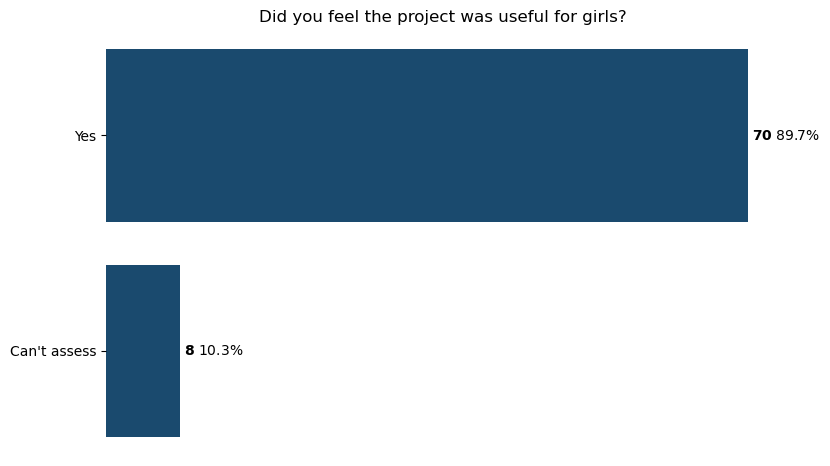

In [71]:
## Project was useful

useful_map = {
    'Ano': 'Yes',
    'Nie': 'No',
    'Neviem posúdiť': 'Can\'t assess'
}

useful = after_data['Mala si pocit, že projekt bol pre dievčatá užitočný?'].map(useful_map).value_counts()
order = ['Yes', 'No', 'Can\'t assess']
useful = useful.reindex([x for x in order if x in useful.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(useful.index, useful.values, color='#1a4a6e')
plt.title('Did you feel the project was useful for girls?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(useful.values)
for i, v in enumerate(useful.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

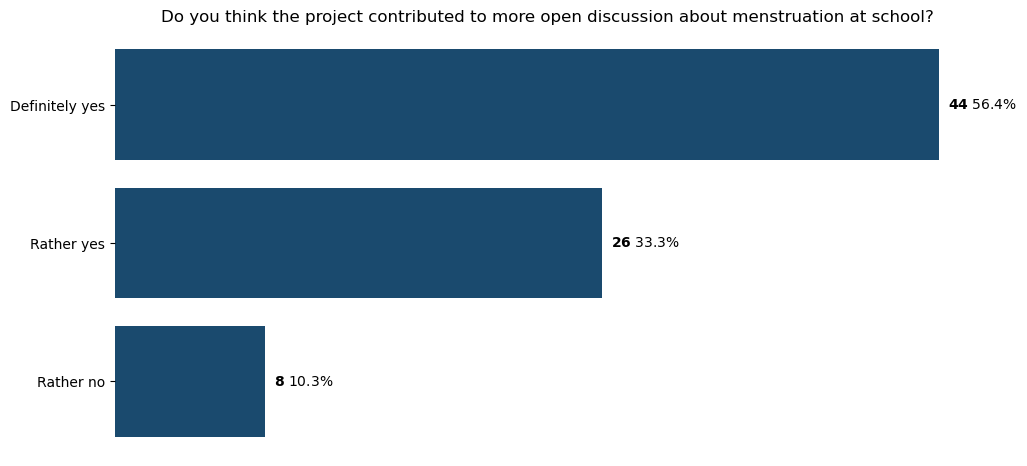

In [72]:
## Project affected how menstruation is discussed

discussion_map = {
    'Určite ano': 'Definitely yes',
    'Skôr ano': 'Rather yes',
    'Skôr nie': 'Rather no',
    'Určite nie': 'Definitely no'
}

discussion = after_data['Myslíš si, že projekt prispel k tomu, aby sa o menštruácii v škole hovorilo otvorenejšie a prirodzenejšie?'].map(discussion_map).value_counts()
order = ['Definitely yes', 'Rather yes', 'Rather no', 'Definitely no']
discussion = discussion.reindex([x for x in order if x in discussion.index])

plt.figure(figsize=(10, 5))
bars = plt.barh(discussion.index, discussion.values, color='#1a4a6e')
plt.title('Do you think the project contributed to more open discussion about menstruation at school?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(discussion.values)
for i, v in enumerate(discussion.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

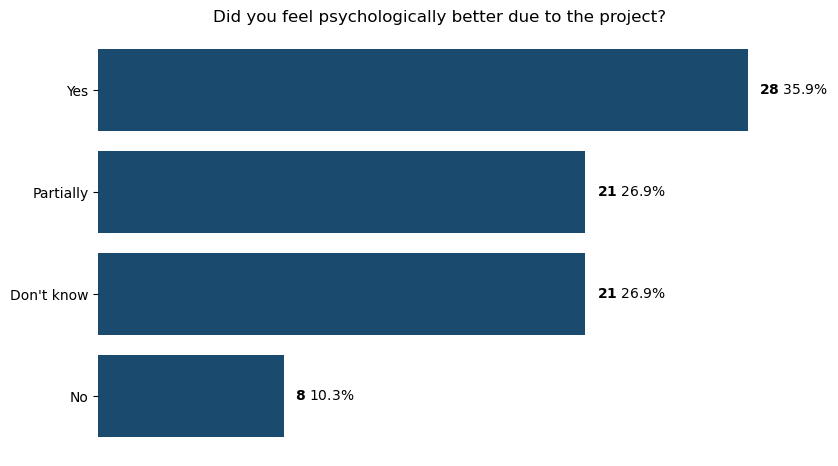

In [73]:
## Feel psychologically better due to project

psych_map = {
    'Ano': 'Yes',
    'Nie': 'No',
    'Čiastočne': 'Partially',
    'Neviem': "Don't know"
}

psych = after_data['Cítila si sa vďaka projektu psychicky lepšie?'].map(psych_map).value_counts()
order = ['Yes', 'Partially', "Don't know", 'No']
psych = psych.reindex([x for x in order if x in psych.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(psych.index, psych.values, color='#1a4a6e')
plt.title('Did you feel psychologically better due to the project?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(psych.values)
for i, v in enumerate(psych.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

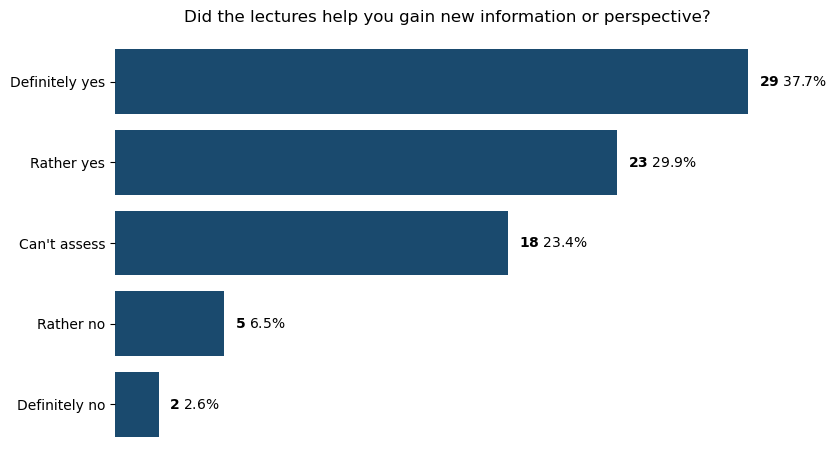

In [74]:
## Lectures helped gain new information

lectures_map = {
    'Určite ano': 'Definitely yes',
    'Skôr ano': 'Rather yes',
    'Neviem posúdiť': 'Can\'t assess',
    'Skôr nie': 'Rather no',
    'Určite nie': 'Definitely no'
}

lectures = after_data['V mesiaci december 2025, sa prebehla vo Vašej škola séria prednášok, na tému: Dospievanie, menštruácia a menštruačná chudoba. Prednášali ti: My mami n.o., Zdravé regióny, DM Drogerie a ČLOVEK v ohrození n.o. Pomohli ti tieto aktivity získať nové informácie alebo iný pohľad na túto tému?'].map(lectures_map).value_counts()
order = ['Definitely yes', 'Rather yes', 'Can\'t assess', 'Rather no', 'Definitely no']
lectures = lectures.reindex([x for x in order if x in lectures.index])

plt.figure(figsize=(8, 5))
bars = plt.barh(lectures.index, lectures.values, color='#1a4a6e')
plt.title('Did the lectures help you gain new information or perspective?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = sum(lectures.values)
for i, v in enumerate(lectures.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{v}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()

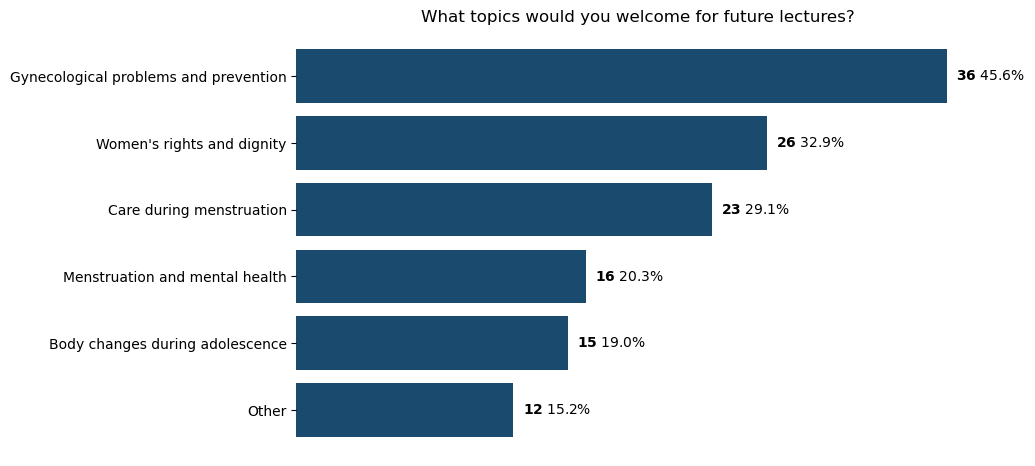

In [75]:
## Future lecture topics preferences (aggregated from binary columns)

# Define the binary topic columns and their English translations
topic_columns = {
    'Téme do budúcna: Gynekologické problémy a prevencia': 'Gynecological problems and prevention',
    'Téma do budúcna: Telesné zmeny v období dospievania': 'Body changes during adolescence',
    'Téma do budúcna: Vzťah menštruácie a psychického zdravia': 'Menstruation and mental health',
    'Téma do budúcna: Starostlivosť počas menštruácie': 'Care during menstruation',
    'Téma do budúcnosti: Práva a dôstojnosť žien': 'Women\'s rights and dignity',
    'Téma do budúcna: iné': 'Other'
}

# Sum the binary columns to get topic preferences
topic_counts = {}
for sk_col, en_label in topic_columns.items():
    if sk_col in after_data.columns:
        topic_counts[en_label] = after_data[sk_col].sum()

# Create series and sort by count descending
topics = pd.Series(topic_counts).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.barh(topics.index, topics.values, color='#1a4a6e')
plt.title('What topics would you welcome for future lectures?')
plt.gca().invert_yaxis()
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().xaxis.set_visible(False)

total = num_responders  # Use total respondents as base for percentage
for i, v in enumerate(topics.values):
    percentage = v / total * 100
    plt.text(v + 0.5, i, f"$\\mathbf{{{int(v)}}}$ {percentage:.1f}%", va='center', fontsize=10)

plt.show()